In [ ]:
# ! pip install kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing Dataset
- 2 ways to import dataset for the project

**Skip from "From Kaggle section if running the project locally**

### From Kaggle:
If using Goolge Colab(tips):
- Sign in to your Kaggle account and go to your account settings page.

- Scroll down to the "API" section and click on the "Create New API Token" button. This will download a file named "kaggle.json" containing your Kaggle API credentials.

- In your Colab notebook, use the following code to upload the "kaggle.json" file

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d zusmani/pakistans-national-assembly-attendance-20182022

  0% 0.00/2.16M [00:00<?, ?B/s]
100% 2.16M/2.16M [00:00<00:00, 124MB/s]


In [4]:
!unzip /content/pakistans-national-assembly-attendance-20182022.zip

Archive:  /content/pakistans-national-assembly-attendance-20182022.zip
  inflating: Attendence of Members - Sessions 1 - 20.xls  
  inflating: Attendence of Members - Sessions 21 - 43.xls  


### From File

2 Main Dataset files:
- Attendence of Members - Sessions 1 - 20.xls
- Attendence of Members - Sessions 21 - 43.xls

In [5]:
s1_20 = pd.read_excel('Attendence of Members - Sessions 1 - 20.xls', skiprows=range(4))
s21_43 = pd.read_excel('Attendence of Members - Sessions 21 - 43.xls', skiprows=range(4))

## Data Exploration

In [6]:
s1_20.head()

,Sl. No.,Constituency,Name of Member,Status
0,1,NA-1,Moulana Abdul Akbar Chitrali,P
1,2,NA-2,Dr. Haider Ali Khan,P
2,3,NA-3,Mr. Saleem Rehman,P
3,4,NA-4,Mr. Murad Saeed,P
4,5,NA-5,Sahibzada Sibghatullah,P


In [7]:
s21_43.head()

,Sl. No.,Constituency,Name of Member,Status
0,1,NA-1,Moulana Abdul Akbar Chitrali,P
1,2,NA-2,Dr. Haider Ali Khan,P
2,3,NA-3,Mr. Saleem Rehman,P
3,4,NA-4,Mr. Murad Saeed,P
4,5,NA-5,Sahibzada Sibghatullah,P


In [8]:
data = pd.concat([s1_20, s21_43])

In [9]:
data.shape

(74486, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74486 entries, 0 to 37242
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sl. No.         73934 non-null  object
 1   Constituency    73296 non-null  object
 2   Name of Member  74144 non-null  object
 3   Status          72642 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [11]:
data.describe()

,Sl. No.,Constituency,Name of Member,Status
count,73934,73296,74144,72642
unique,373,347,686,2
top,1,Reserved Seat,Mr. Muhammad Amjad Farooq Khan Khosa,P
freq,300,15426,298,72346


In [12]:
data.isnull().sum()

Sl. No.            552
Constituency      1190
Name of Member     342
Status            1844
dtype: int64

## Removing Null values also Noise in the data

In [13]:
data[data['Sl. No.'].isnull()].head(10)

,Sl. No.,Constituency,Name of Member,Status
298,NaN,NaN,(Notice Office),NaN
627,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN
628,NaN,NaN,(Notice Office),NaN
963,NaN,NaN,(Notice Office),NaN
1839,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN
1840,NaN,NaN,(Notice Office),NaN
2081,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN
2082,NaN,NaN,(Notice Office),NaN
2368,NaN,NaN,NATIONAL ASSEMBLY SECRETARIAT,NaN
2369,NaN,NaN,(Notice Office),NaN


In [14]:
data[data['Sl. No.'].isnull()]["Constituency"].value_counts()

Series([], Name: Constituency, dtype: int64)

In [15]:
data = data[data['Sl. No.'].notnull()]

In [16]:
data.isnull().sum()

Sl. No.              0
Constituency       638
Name of Member     342
Status            1292
dtype: int64

In [17]:
data[data['Constituency'].isnull()].head()

,Sl. No.,Constituency,Name of Member,Status
297,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,NaN
299,The following Members-elect made oath on 13th ...,NaN,NaN,NaN
629,1st Session,NaN,"2nd Sitting held on Wednesday, the 15th August...",NaN
630,The following Members National Assembly of Pak...,NaN,NaN,NaN
962,NATIONAL ASSEMBLY SECRETARIAT,NaN,NaN,NaN


In [18]:
data[data['Constituency'].isnull()]["Status"].value_counts()

Series([], Name: Status, dtype: int64)

In [19]:
data = data[data['Constituency'].notnull()]

In [20]:
data.isnull().sum()

Sl. No.             0
Constituency        0
Name of Member      0
Status            654
dtype: int64

In [21]:
data[data['Status'].isnull()]

,Sl. No.,Constituency,Name of Member,Status
300,S.l #,Consituancy,Name,NaN
301,1,NA-1,Moulana Abdul Akbar Chitrali,NaN
302,2,NA-2,Mr. Haider Ali Khan,NaN
303,3,NA-3,Mr. Saleem Rehman,NaN
304,4,NA-4,Mr. Murad Saeed,NaN
...,...,...,...,...
622,322,Reserved Seats,Dr. Darshan,NaN
623,323,Reserved Seats,Mr. Kesoo Mal Kheeal Das,NaN
624,324,Reserved Seats,Mr. Ramesh Lal,NaN
625,325,Reserved Seats,Mr. Naveed Aamir,NaN


So, our objective is to find the member how is more punctual. If Status is NULL then these records are not useful.

In [22]:
data = data[data['Status'].notnull()]

In [23]:
data.isnull().sum()

Sl. No.           0
Constituency      0
Name of Member    0
Status            0
dtype: int64

NULL values are removed, Now explore is there any wrong or false information to improve the quality of data.

In [24]:
data

,Sl. No.,Constituency,Name of Member,Status
0,1,NA-1,Moulana Abdul Akbar Chitrali,P
1,2,NA-2,Dr. Haider Ali Khan,P
2,3,NA-3,Mr. Saleem Rehman,P
3,4,NA-4,Mr. Murad Saeed,P
4,5,NA-5,Sahibzada Sibghatullah,P
...,...,...,...,...
37238,193,Reserved Seat,Ms. Shunila Ruth,P
37239,194,Reserved Seat,Mr. Ramesh Kumar Vankwani,P
37240,195,Reserved Seat,Mr. Jamshed Thomas,P
37241,196,Reserved Seat,Dr. Darshan,P


In [25]:
data["Name of Member"].value_counts()

Mr. Muhammad Amjad Farooq Khan Khosa    296
Begum Tahira Bukhari                    292
Rana Shamim Ahmed Khan                  292
Ms. Fauzia Behram                       290
Mr. Aftab Shahban Mirani                290
                                       ... 
Ali Nawaz Awan                            2
Ali Gohar Khan                            2
Muhammad Alamgir Khan                     2
Sardar Muhammad Akhtar Mengal             2
Mr.Zahid Akram Durrani                    2
Name: Name of Member, Length: 534, dtype: int64

In [26]:
data["Constituency"].value_counts()

Reserved Seat    15426
Reserve Seat       916
NA-190             296
Constituency       296
NA-76              292
                 ...  
NA-319               2
NA-299               2
NA-302               2
NA-309               2
NA-304               2
Name: Constituency, Length: 346, dtype: int64

So, Following records are also useless

In [27]:
data[data["Constituency"] == "Constituency"]

,Sl. No.,Constituency,Name of Member,Status
631,Sl. #,Constituency,Name of Member,Status
966,Sl. #,Constituency,Name of Member,Status
1299,S. No,Constituency,Name,Status
1538,S. No,Constituency,Name,Status
1843,Sl. #,Constituency,Name of Member,Status
...,...,...,...,...
36060,Sl. No.,Constituency,Name of Member,Status
36279,Sl. No.,Constituency,Name of Member,Status
36542,Sl. No.,Constituency,Name of Member,Status
36781,Sl. No.,Constituency,Name of Member,Status


In [28]:
data = data[data["Constituency"] != "Constituency"]

In [29]:
data

,Sl. No.,Constituency,Name of Member,Status
0,1,NA-1,Moulana Abdul Akbar Chitrali,P
1,2,NA-2,Dr. Haider Ali Khan,P
2,3,NA-3,Mr. Saleem Rehman,P
3,4,NA-4,Mr. Murad Saeed,P
4,5,NA-5,Sahibzada Sibghatullah,P
...,...,...,...,...
37238,193,Reserved Seat,Ms. Shunila Ruth,P
37239,194,Reserved Seat,Mr. Ramesh Kumar Vankwani,P
37240,195,Reserved Seat,Mr. Jamshed Thomas,P
37241,196,Reserved Seat,Dr. Darshan,P


**Total seats in National Assembly is 342**<br>
Members can be more than 342 some members lost there lives during there tenure.<br> but here it seems that there are spelling mistakes

In [30]:
data["Name of Member"].value_counts()

Mr. Muhammad Amjad Farooq Khan Khosa                         296
Rana Shamim Ahmed Khan                                       292
Begum Tahira Bukhari                                         292
Mr. Aftab Shahban Mirani                                     290
Ms. Fauzia Behram                                            290
                                                            ... 
Zahid Akram Durrani                                            2
Mr.Aftab Hussain Siddique                                      2
Mr.Ali Gohar Khan                                              2
Mr.Ali Nawaz Awan                                              2
Sahibzada Muhammad Ameer Sultan      (He made oath today)      2
Name: Name of Member, Length: 532, dtype: int64

But Constituencies should be not more then 273, So there is also problems

In [31]:
data['Constituency'].value_counts()

Reserved Seat    15426
Reserve Seat       916
NA-190             296
NA-76              292
NA-184             292
                 ...  
NA-302               2
NA-299               2
NA-293               2
NA-286               2
NA-304               2
Name: Constituency, Length: 345, dtype: int64

In [32]:
data[data['Constituency'] == "Reserve seat"]

,Sl. No.,Constituency,Name of Member,Status
5862,189,Reserve seat,Ms. Tahira Aurangzeb,P
5863,190,Reserve seat,Ms. Shaista Pervaiz,P
5864,191,Reserve seat,Ms. Maryam Aurangzaib,P
5865,192,Reserve seat,Ms. Shaza Fatima Khawaja,P
5866,193,Reserve seat,Ms. Aisha Ghaus Pasha,P
...,...,...,...,...
5915,242,Reserve seat,Mr. Jamshed Thomas,P
5916,243,Reserve seat,Dr. Darshan,P
5917,244,Reserve seat,Mr. Kesoo Mal Kheeal Das,P
5918,245,Reserve seat,Mr. Ramesh Lal,P


In [33]:
data["Constituency"] = data["Constituency"].replace({"Reserved Seat":"Reserved Seats", "Reserve Seat":"Reserved Seats",
                                                     "Reserved Seate":"Reserved Seats", "Reserved seat":"Reserved Seats", 
                                                     "Reserve seat":"Reserved Seats"})

<ipython-input-33-63056a939f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Constituency"] = data["Constituency"].replace({"Reserved Seat":"Reserved Seats", "Reserve Seat":"Reserved Seats",


In [34]:
data['Constituency'].value_counts()

Reserved Seats    16962
NA-190              296
NA-184              292
NA-76               292
NA-202              290
                  ...  
NA-299                2
NA-302                2
NA-304                2
NA-309                2
NA-339                2
Name: Constituency, Length: 340, dtype: int64

In [35]:
reserved_constituencies = ["NA-{}".format(X) for X in range(273,343)]
reserved_constituencies[:5]

['NA-273', 'NA-274', 'NA-275', 'NA-276', 'NA-277']

In [36]:
data["Constituency"] = data["Constituency"].replace(reserved_constituencies, "Reserved Seats")

<ipython-input-36-fa6b8e089e11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Constituency"] = data["Constituency"].replace(reserved_constituencies, "Reserved Seats")


In [37]:
data['Constituency'].value_counts()

Reserved Seats    17174
NA-190              296
NA-76               292
NA-184              292
NA-202              290
                  ...  
NA-95                48
NA-168               46
NA-101               42
NA-187               36
NA-223               28
Name: Constituency, Length: 273, dtype: int64

**Now, Constituency column data seems perfect**

In [38]:
data

,Sl. No.,Constituency,Name of Member,Status
0,1,NA-1,Moulana Abdul Akbar Chitrali,P
1,2,NA-2,Dr. Haider Ali Khan,P
2,3,NA-3,Mr. Saleem Rehman,P
3,4,NA-4,Mr. Murad Saeed,P
4,5,NA-5,Sahibzada Sibghatullah,P
...,...,...,...,...
37238,193,Reserved Seats,Ms. Shunila Ruth,P
37239,194,Reserved Seats,Mr. Ramesh Kumar Vankwani,P
37240,195,Reserved Seats,Mr. Jamshed Thomas,P
37241,196,Reserved Seats,Dr. Darshan,P


**Sl. No. column is seem irrelevent. So, going to drop**

In [39]:
data['Sl. No.']

0          1
1          2
2          3
3          4
4          5
        ... 
37238    193
37239    194
37240    195
37241    196
37242    197
Name: Sl. No., Length: 72346, dtype: object

In [40]:
data['Sl. No.'].value_counts()

1      298
108    298
101    298
102    298
103    298
      ... 
329      8
330      8
331      4
332      4
333      2
Name: Sl. No., Length: 333, dtype: int64

In [41]:
data = data.drop('Sl. No.', axis=1)

Its time to correct name of members. especially we need correct name for the analysis of Reserved Seats members 

In [42]:
data["Name of Member"].value_counts()

Mr. Muhammad Amjad Farooq Khan Khosa                         296
Rana Shamim Ahmed Khan                                       292
Begum Tahira Bukhari                                         292
Mr. Aftab Shahban Mirani                                     290
Ms. Fauzia Behram                                            290
                                                            ... 
Zahid Akram Durrani                                            2
Mr.Aftab Hussain Siddique                                      2
Mr.Ali Gohar Khan                                              2
Mr.Ali Nawaz Awan                                              2
Sahibzada Muhammad Ameer Sultan      (He made oath today)      2
Name: Name of Member, Length: 532, dtype: int64

In [43]:
count = 0
constituencies = ["NA-{}".format(X) for X in range(1,273)]
for X in constituencies:
  if data[data["Constituency"] == X]["Name of Member"].value_counts().count() > 1:
    count += 1
    print(data[data["Constituency"] == X]["Name of Member"].value_counts())

Dr. Haider Ali Khan    180
Mr. Haider Ali Khan      6
Name: Name of Member, dtype: int64
Mr. Saleem Rehman     220
Mr. Saleem  Rehman     22
Name: Name of Member, dtype: int64
Mr. Ibadullah Khan     166
Mr. lbad Ullah Khan      4
Name: Name of Member, dtype: int64
Prince Muhammad Nawaz Alai    268
Mr. Muhammad Nawaz Khan        10
Mr. Muhammad  Nawaz Khan        4
Name: Name of Member, dtype: int64
Mr. Asad Qaiser    206
Mr. Asad Qaisar      4
Name: Name of Member, dtype: int64
Engr. Usman Khan Tarakai     226
Engr. Usman Khan  Tarakai     24
Mr. Usman Khan                14
Name: Name of Member, dtype: int64
Mr. Ali Muhammad Khan    282
Mr. Ali Muhammad           6
Name: Name of Member, dtype: int64
Malik Anwar Taj    266
Mr. Anwar Taj        4
Name: Name of Member, dtype: int64
Mr. Imran Khattak    248
Mr. lmran Khattak      4
Name: Name of Member, dtype: int64
Mr. Arbab Amir Ayub    154
Arbab Amir Ayub          4
Name: Name of Member, dtype: int64
Mr. Nasir Khan Musa Zai    232
Mr. 

In [44]:
print(count)

114


**Problem in atleast 114 members name**

In [45]:
data['Name of Member'] = data['Name of Member'].replace('Ms. Wajiha Akram', 'Ms. Wajiha Qamar')
data['Name of Member'] = data['Name of Member'].replace('Mrs. Farukh Khan', 'Ms. Farukh Khan')
data['Name of Member'] = data['Name of Member'].replace(['Dr. Aisha Ghaus Pasha','Ms. Aisha Ghaus Pasha'], 'Dr. Aysha Ghaus Pasha')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shamim Panhwar', 'Ms. Shamim Ara Panhwar')
data['Name of Member'] = data['Name of Member'].replace(['Dr. Samina  Matloob','Dr. Samina Matloob'], 'Ms. Samina Matloob')
data['Name of Member'] = data['Name of Member'].replace('Ms. Nafeesa lnayatullah Khan Khattak', 'Ms. Nafeesa Inayatullah Khan Khattak')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shamim Ara Pahnwar', 'Ms. Shamim Ara Panhwar')
data['Name of Member'] = data['Name of Member'].replace('Ms. Naseebha Channa                           (She  made oath today)', 'Ms. Nasiba Channa')
data['Name of Member'] = data['Name of Member'].replace('Romina Khurshid Alam', 'Ms. Romina Khurshid Alam')
data['Name of Member'] = data['Name of Member'].replace(['Dr. Seemin Abdul Rehman Bokhari', 'Seemi Bokhari','Dr. Seemi  Bokhari',
       'Ms. Seemi Bokhari', 'MS. Seemi Bokhari', 'Ms.Seemi Bokhari'], 'Dr. Seemi Bokhari')
data['Name of Member'] = data['Name of Member'].replace('Mr. Naveed Aamir  Jeeva', 'Mr. Naveed Aamir Jeeva')
data['Name of Member'] = data['Name of Member'].replace('Dr. Ramesh Kumar Vankwani', 'Mr. Ramesh Kumar Vankwani')
data['Name of Member'] = data['Name of Member'].replace(['Ms. Maleeka Ali Bokhari.','Ms. Maleeka Ali Bokhari'], 'Ms. Maleeka Ali Bokhari')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shahida  Rehmani', 'Ms. Shahida Rehmani')
data['Name of Member'] = data['Name of Member'].replace('Ms. Mahreen Razzaq Bhutto', 'Dr. Mahreen Razzaq Bhutto')
data['Name of Member'] = data['Name of Member'].replace('Ms. Rubina lrfan', 'Ms. Rubina Irfan')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shunila  Ruth', 'Ms. Shunila Ruth')
data['Name of Member'] = data['Name of Member'].replace(['Ms. Naureen Farooq  Ibrahim','Ms. Naureen Farooq Ibrahim'], 'Ms. Nooreen Farooq Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr.James Iqbal', 'Mr. James Iqbal')
data['Name of Member'] = data['Name of Member'].replace('Ms. Nousheen Hamid', 'Dr. Nausheen Hamid')
data['Name of Member'] = data['Name of Member'].replace('Ms. Asma Qadeer', 'Ms. Asma Hadeed')
data['Name of Member'] = data['Name of Member'].replace('Ms. Wajiha Akram', 'Ms. Wajiha Qamar')
data['Name of Member'] = data['Name of Member'].replace('Mr. Naveed Aamir', 'Mr. Naveed Aamir Jeeva')
data['Name of Member'] = data['Name of Member'].replace('Ms. Kiran lmran Dar', 'Ms. Kiran Imran Dar')
data['Name of Member'] = data['Name of Member'].replace(['Ms. Shahnza Naseer Baloch', 'Ms. Shahnaz Naseer Baloch'], 'Prof. Dr. Shahnaz Baloch')
data['Name of Member'] = data['Name of Member'].replace('Ms. Javairia Zafar', 'Javaria Zafar Aheer')
data['Name of Member'] = data['Name of Member'].replace('Ms. Farrukh Khan', 'Ms. Farukh Khan')
data['Name of Member'] = data['Name of Member'].replace('Ms. Mussarat', 'Ms. Mussarat Rafiq Mahesar')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shahida Begum', 'Mrs. Shahida Akhtar Ali')

In [46]:
data['Name of Member'] = data['Name of Member'].replace('Mr. Haider Ali Khan', 'Dr. Haider Ali Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Saleem  Rehman', 'Mr. Saleem Rehman')
data['Name of Member'] = data['Name of Member'].replace('Mr. lbad Ullah Khan', 'Mr. Ibadullah Khan')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Nawaz Khan','Mr. Muhammad  Nawaz Khan'], 'Prince Muhammad Nawaz Alai')
data['Name of Member'] = data['Name of Member'].replace('Mr. Asad Qaisar', 'Mr. Asad Qaiser')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Usman Khan', 'Engr. Usman Khan  Tarakai'], 'Engr. Usman Khan Tarakai')
data['Name of Member'] = data['Name of Member'].replace('Mr. Ali Muhammad', 'Mr. Ali Muhammad Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Anwar Taj', 'Malik Anwar Taj')
data['Name of Member'] = data['Name of Member'].replace('Mr. lmran Khattak', 'Mr. Imran Khattak')
data['Name of Member'] = data['Name of Member'].replace('Arbab Amir Ayub', 'Mr. Arbab Amir Ayub')
data['Name of Member'] = data['Name of Member'].replace('Mr. Nasir Khan', 'Mr. Nasir Khan Musa Zai')
data['Name of Member'] = data['Name of Member'].replace('Mr. ShaukatAli', 'Mr. Shaukat Ali')
data['Name of Member'] = data['Name of Member'].replace('Mr. Sheharyar Afridi', 'Mr. Shehryar Afridi')
data['Name of Member'] = data['Name of Member'].replace('Mr. Asad Mahmood', 'Mr. Asad Mehmood')
data['Name of Member'] = data['Name of Member'].replace(['Zahid Akram Durrani', 'Mr.Zahid Akram Durrani'], 'Mr. Zahid Akram Durrani')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Yaqoob Sheikh', 'Mr. Muhammad Yaqoob Shaikh')
data['Name of Member'] = data['Name of Member'].replace('Mr. Gul Dad Khan', 'Mr. Gul Dad khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Iqbal Khan', 'Mr. Mohammad Iqbal Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Mohsin Javd', 'Mr. Mohsin Dawar')
data['Name of Member'] = data['Name of Member'].replace('Mr. Aamer Mehmood Kiyani', 'Mr. Aamir Mehmood Kiyani')
data['Name of Member'] = data['Name of Member'].replace(['Ali Nawaz Awan', 'Mr.Ali Nawaz Awan'], 'Mr. Ali Nawaz Awan')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Ali', 'Mr. Ali  Wazir'], 'Mr. Ali Wazir')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Jamal ud Din ', 'Mr. Muhammad Jamal Ud Din'], 'Mr. Muhammad Jamal-ud-Din')
data['Name of Member'] = data['Name of Member'].replace('Mr.Mohammad Aslam Bhootani', 'Mr. Mohammad Aslam Bhootani')
data['Name of Member'] = data['Name of Member'].replace('Ms. Zubiada Jalal', 'Ms. Zubaida Jalal')
data['Name of Member'] = data['Name of Member'].replace(['Muhammad Akhtar Mengal', 'Sardar Muhammad Akhtar Mengal'], 'Mr. Muhammad Akhtar Mengal')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Hashim   A ezai', 'Mr. Muhammad Hashim  Notezai', 'Mr. Muhammad Hashim'], 'Mr. Muhammad Hashim Notezai')
data['Name of Member'] = data['Name of Member'].replace('Mr.Agha Hassan Baloch', 'Agha Hassan Baloch')
data['Name of Member'] = data['Name of Member'].replace('Mr. Asmat Ullah', 'Mr. Asmatullah')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Salah Ud Din Ayubi', 'Salah Ud Din'], 'Mr. Salahuddin Ayubi')
data['Name of Member'] = data['Name of Member'].replace('Mr. Kamal Ud din', 'Mr. Kamal Uddin')
data['Name of Member'] = data['Name of Member'].replace(['Nawabzada Shah Zain Bugti', 'Nawabzada Shazain  Bugti', 'Nawabzada Shazain Bugti'], 'Nawabzada Shah Zain Bugtti')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad lsrar Tareen', 'Mr. Muhammad Israr Tareen')
data['Name of Member'] = data['Name of Member'].replace('Mr.Muhammad Najeeb Haroon', 'Mr. Muhammad Najeeb Haroon')
data['Name of Member'] = data['Name of Member'].replace('Mr. Aftab Jhangir', 'Mr. Aftab Jehangir')
data['Name of Member'] = data['Name of Member'].replace('Mr. Atta Ullah', 'Mr. Attaullah')

In [47]:
data['Name of Member'] = data['Name of Member'].replace('Syed lftikhar-ul-Hassan', 'Syed Iftikhar Ul Hassan')
data['Name of Member'] = data['Name of Member'].replace('Ch. Amir Sultan Cheema', 'Ch. Aamir Sultan Cheema')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Afzal Khan Dhandla', 'Mr. Muhammad Afzal Khan', 'Dr. Muhammad Afzal Khan  Dhandla'], 'Dr. Muhammad Afzal Khan Dhandla')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Ghulam Muhammad', 'Mehar Ghulam Muhammad  Lali', 'Mahr Ghulam Muhammad Lali'], 'Mehar Ghulam Muhammad Lali')
data['Name of Member'] = data['Name of Member'].replace(['Ali Gohar Khan', 'Mr.Ali Gohar Khan'], 'Mr. Ali Gohar Khan')
data['Name of Member'] = data['Name of Member'].replace(['Ms. Ghulam Bibi  Bharwana', 'Ms. Ghulam Bibi'], 'Ms. Ghulam Bibi Bharwana')
data['Name of Member'] = data['Name of Member'].replace(['Sahibzada Muhammad Ameer Sultan', 'Sahibzada Muhammad Ameer Sultan      (He made oath today)'], 'Mr. Muhammad Ameer Sultan')
data['Name of Member'] = data['Name of Member'].replace('Ms. Shaista Pervaiz', 'Shaista Pervaiz Malik')
data['Name of Member'] = data['Name of Member'].replace(['Malik Karamat Ali', 'Malik Karamat Ali  Khokhar'], 'Malik Karamat Ali Khokhar')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Afzal  Khokhar', 'Mr. Muhammad Afzal'], 'Mr. Muhammad Afzal Khokhar')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Mueen Watto', 'Mr. Muhammad Mueen Wattoo'], 'Mr. Muhammad Moeen Wattoo')
data['Name of Member'] = data['Name of Member'].replace(['Rana lradat Sharif Khan', 'Mr. Rana Iradat Sharif Khan'], 'Rana Iradat Sharif Khan')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Ahmed Hussain', 'Mr. Ahmad Hussain'], 'Mr. Ahmad Hussain Deharr')
data['Name of Member'] = data['Name of Member'].replace(['Malik Muhammad Aamir Dogar', 'Mr. Malik Muhammad Amir Dogar'], 'Malik Muhammad Amir Dogar')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Zartaj Gul', 'Ms. Zartaj Gull'], 'Ms. Zartaj Gul')
data['Name of Member'] = data['Name of Member'].replace(['Makhdom Basit  Bokhari', 'Makhdom Zada Sayed Basit Ahmad Sultan', 'Makhdoomzada Syed Basit Ahmed Sultan'], 'Makhdom Basit Bokhari')
data['Name of Member'] = data['Name of Member'].replace(['Sardar Muhammad Khan Leghari', 'Sirdar Muhammad Khan Laghari'], 'Sardar Muhammad Khan Laghari')
data['Name of Member'] = data['Name of Member'].replace(['Shazia Marri', 'Shazia Jannat Marri', 'Ms. Shazia Jannat Marri'], 'Ms. Shazia Marri')
data['Name of Member'] = data['Name of Member'].replace('Pir Ameer Ali Shah Jillani', 'Pir Ameer Ali Shah Jeelani')
data['Name of Member'] = data['Name of Member'].replace(['Engr. Sabir Hussain Qaim Khani', 'Mr. Sabir Hussain'], 'Engr. Sabir Hussain Kaim Khani')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Muhammad Akram  Cheema', 'Mr. Muhammad Akram Cheema'], 'Mr. Muhammad Akram')
data['Name of Member'] = data['Name of Member'].replace(['Muhammad Alamgir Khan', 'Mr.Muhammad Alamgir Khan'], 'Mr. Muhammad Alamgir Khan')
data['Name of Member'] = data['Name of Member'].replace(['Mr. Aftab Hussain Siddique', 'Mr.Aftab Hussain Siddique'], 'Aftab Hussain Siddique')
data['Name of Member'] = data['Name of Member'].replace('Mr.Qadir Khan Mandokhail', 'Mr. Qadir Khan Mandokhail')

In [48]:
data['Name of Member'] = data['Name of Member'].replace('Syed Ali Haider ziadii', 'Syed Ali Haider Zaidi')
data['Name of Member'] = data['Name of Member'].replace('Syed Rafiullah', 'Syed Agha Rafiullah')
data['Name of Member'] = data['Name of Member'].replace('Mr. Jamil Ahmid Khan', 'Mr. Jamil Ahmed Khan')
data['Name of Member'] = data['Name of Member'].replace('Jam Abdul Karim Bajir', 'Jam Abdul Karim Bijar')
data['Name of Member'] = data['Name of Member'].replace('Mr. lrfan Ali Laghari', 'Mr. Irfan Ali Leghari')
data['Name of Member'] = data['Name of Member'].replace('Mr.Salahuddin', 'Mr. Salahuddin')
data['Name of Member'] = data['Name of Member'].replace('Makhdoom Jamil uz Zaman', 'Makhdoom Jameel Uz Zaman')
data['Name of Member'] = data['Name of Member'].replace('Nawab Muhammad Yousf Talpur', 'Mr. Jamil Ahmed Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Naveed Dero                                       (He made oath today)', 'Mr. Naveed Dero')
data['Name of Member'] = data['Name of Member'].replace('Mr.Asif Ali Zardari', 'Mr. Asif Ali Zardari')
data['Name of Member'] = data['Name of Member'].replace('Mr. Ali Muhammad Khan Mahar', 'Sardar Muhammad Bux Khan Mahar')
data['Name of Member'] = data['Name of Member'].replace('Mr. Khalid Ahmand Khan lund', 'Mr. Khalid Ahmed Khan Lund')
data['Name of Member'] = data['Name of Member'].replace('Mr. Ehsan-ur-Rehman Mazari', 'Mr. Ehsan ur Rehman Mazari')
data['Name of Member'] = data['Name of Member'].replace('Khawaja Sheraz Mehmood', 'Khawja Sheraz Mehmood')
data['Name of Member'] = data['Name of Member'].replace('Mr. Niaz Ahmedn', 'Mr. Niaz Ahmed Jakhar')
data['Name of Member'] = data['Name of Member'].replace('Mr. Aamir Talal Khan', 'Mr. Aamir Talal Gopang')
data['Name of Member'] = data['Name of Member'].replace('Nawabzada lftekhar Ahmed Khan Babar', 'Nawabzada Iftakhar Ahmed Khan Babar')
data['Name of Member'] = data['Name of Member'].replace('Mahar lrshad Ahmad Khan', 'Mahar Irshad Ahmad Khan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Javed Iqbal', 'Ch. Javed Iqbal Waraich')
data['Name of Member'] = data['Name of Member'].replace('Makhdoom Khusro Bukhtiar', 'Makhdoom Khusro Bukhtyar')
data['Name of Member'] = data['Name of Member'].replace('Syed Mubeen Ahmed', 'Syed Mobeen Ahmed')
data['Name of Member'] = data['Name of Member'].replace('Makhdoom Syed Sami-ul- Hassan Gillani', 'Makhdoom Syed Sami ul Hassan Gillani')
data['Name of Member'] = data['Name of Member'].replace('Mian Najeeb Ud Din Awaisi', 'Mian Najeeb ud Din Awaisi')
data['Name of Member'] = data['Name of Member'].replace('Ch. Tariq Bashir Cheema', 'Chaudhary Tariq Bashir Cheema')
data['Name of Member'] = data['Name of Member'].replace('Mr. Noor UI Hassan Tanvir', 'Mr. Noor ul Hassan Tanvir')
data['Name of Member'] = data['Name of Member'].replace('Mr. Ehsan UI Haq Bajwa', 'Mr. Ehsan Ul Haq Bajwa')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Abdul Ghafar Watto', 'Mr. Muhammad Abdul Ghafar Wattoo')
data['Name of Member'] = data['Name of Member'].replace('Ch. Faqir Ahmad', 'Choudhary Faqir Ahmad')

In [49]:
data['Name of Member'] = data['Name of Member'].replace('Mr. Abdul Rehman Khan Kanju', 'Mr. Abdul Rehman Kanju')
data['Name of Member'] = data['Name of Member'].replace('Ch. lftikhar Nazir', 'Chaudhry Iftikhar Nazir')
data['Name of Member'] = data['Name of Member'].replace('Ch. Muhammad Ashraf', 'Chaudhry Muhammad Ashraf')
data['Name of Member'] = data['Name of Member'].replace('Syed lmran Ahmad Shah', 'Syed Imran Ahmad Shah')
data['Name of Member'] = data['Name of Member'].replace('Rana Muhammad lshaq Khan', 'Rana Muhammad Ishaq Khan')
data['Name of Member'] = data['Name of Member'].replace('Sh. Rohale Asghar', 'Sheikh Rohale Asghar')
data['Name of Member'] = data['Name of Member'].replace('Sardar Muhammad Arfan Dogar', 'Sardar Muhammad Irfan Dogar')
data['Name of Member'] = data['Name of Member'].replace('Mr. ljaz Ahmad Shah', 'Mr. Ijaz Ahmad Shah')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Berjees Tahir', 'Ch. Muhammad Barjees Tahir')
data['Name of Member'] = data['Name of Member'].replace('Sahibzada Muhammad Mehboob Sultan   (He made oath today)', 'Sahibzada Muhammad Mehboob Sultan')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Riaz Khan', 'Mr. Riaz Fatyana')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Junaid Anwar Ch.', 'Mr. Muhammad Junaid Anwar Chaudhry')
data['Name of Member'] = data['Name of Member'].replace('Mr. Farukh Habib', 'Mr. Farrukh Habib')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Shahbaz Babar', 'Ch. Muhammad Shahbaz Babar')
data['Name of Member'] = data['Name of Member'].replace('Mr. lmran Ahmad Khan Niazi', 'Mr. Imran Khan')
data['Name of Member'] = data['Name of Member'].replace('Syed Javed Hussain', 'Syed Javed Husnain')
data['Name of Member'] = data['Name of Member'].replace('Mr.Mohsin Nawaz Ranjha', 'Mr. Mohsin Nawaz Ranjha')
data['Name of Member'] = data['Name of Member'].replace('Haji lmtiaz Ahmed Choudhary', 'Haji Imtiaz Ahmed Choudhary')
data['Name of Member'] = data['Name of Member'].replace('Mr. Zulfiqar Ahmad', 'Ch. Zulfiqar Ali Bhinder')
data['Name of Member'] = data['Name of Member'].replace('Mr. Usman Ibrahim                                 (He  made oath today)', 'Mr. Usman Ibrahim')
data['Name of Member'] = data['Name of Member'].replace('Mr. Nisar Ahmad Cheema', 'Mr. Nisar Ahmed Cheema')
data['Name of Member'] = data['Name of Member'].replace('Ch. Abid Raza', 'Chaudhry Abid Raza')
data['Name of Member'] = data['Name of Member'].replace('Mr. Moonis  Elahi', 'Mr. Moonis Elahi')
data['Name of Member'] = data['Name of Member'].replace('Ch. Salik  Hussain', 'Ch. Salik Hussain')
data['Name of Member'] = data['Name of Member'].replace('Mr. Zulfiqar Ali Khan', 'Sardar Zulfiqar Ali Khan Dullah')
data['Name of Member'] = data['Name of Member'].replace('Mr. Muhammad Jamal ud Din', 'Mr. Muhammad Jamal-ud-Din')
data['Name of Member'] = data['Name of Member'].replace('Mr. Niaz Ahmed', 'Mr. Niaz Ahmed Jakhar')
data['Name of Member'] = data['Name of Member'].replace('Syed Ali Haider ziadi', 'Syed Ali Haider Zaidi')

In [50]:
count = 0
for X in constituencies:
  if data[data["Constituency"] == X]["Name of Member"].value_counts().count() > 1:
    count += 1
    print(data[data["Constituency"] == X]["Name of Member"].value_counts())

print(count)

Mr. Munir Khan Orakzai    200
Mr. Fakhar Zaman Khan       4
Name: Name of Member, dtype: int64
Syed Iftikhar Ul Hassan    254
Ms. Nosheen Iftikhar         8
Name: Name of Member, dtype: int64
Ch. Aamir Sultan Cheema    100
Mr. Zulfiqar Ali Bhatti     34
Name: Name of Member, dtype: int64
Mr. Mohammad Pervaiz Malik    212
Shaista Pervaiz Malik           4
Name: Name of Member, dtype: int64
Nawab Muhammad Yousuf Talpur    208
Mr. Jamil Ahmed Khan              4
Name: Name of Member, dtype: int64
Pir Noor Muhammad Shah Jillani    166
Pir Ameer Ali Shah Jeelani          8
Name: Name of Member, dtype: int64
Aftab Hussain Siddique     158
Dr. Arif-ur-Rehman Alvi      4
Name: Name of Member, dtype: int64
Mr. Muhammad Faisal Vawda    78
Mr. Qadir Khan Mandokhail     8
Name: Name of Member, dtype: int64
8


These 8 are fine as they are different people

In [51]:
data.loc[(data["Constituency"] == "Reserved Seats") & (data["Name of Member"] == 'Mr. Mohammad Aslam Bhootani'), "Constituency"] = 'NA-272'
data.loc[(data["Constituency"] == "Reserved Seats") & (data["Name of Member"] == 'Ms. Zubaida Jalal'), "Constituency"] = 'NA-271'

In [52]:
data["Name of Member"].value_counts()

Mr. Muhammad Amjad Farooq Khan Khosa    296
Rana Shamim Ahmed Khan                  292
Begum Tahira Bukhari                    292
Mrs. Shahida Akhtar Ali                 292
Nawabzada Iftakhar Ahmed Khan Babar     292
                                       ... 
Mr. Qadir Khan Mandokhail                 8
Ms. Nosheen Iftikhar                      8
Dr. Arif-ur-Rehman Alvi                   4
Mr. Fakhar Zaman Khan                     4
Ms. Shakila Luqman                        2
Name: Name of Member, Length: 349, dtype: int64

Now, count of members are surely accurate

Adding 1 more column that will improve quality of plots

In [53]:
data['Member Name and Constituency'] = data['Name of Member'] + ' - ' + data['Constituency']

In [54]:
data

,Constituency,Name of Member,Status,Member Name and Constituency
0,NA-1,Moulana Abdul Akbar Chitrali,P,Moulana Abdul Akbar Chitrali - NA-1
1,NA-2,Dr. Haider Ali Khan,P,Dr. Haider Ali Khan - NA-2
2,NA-3,Mr. Saleem Rehman,P,Mr. Saleem Rehman - NA-3
3,NA-4,Mr. Murad Saeed,P,Mr. Murad Saeed - NA-4
4,NA-5,Sahibzada Sibghatullah,P,Sahibzada Sibghatullah - NA-5
...,...,...,...,...
37238,Reserved Seats,Ms. Shunila Ruth,P,Ms. Shunila Ruth - Reserved Seats
37239,Reserved Seats,Mr. Ramesh Kumar Vankwani,P,Mr. Ramesh Kumar Vankwani - Reserved Seats
37240,Reserved Seats,Mr. Jamshed Thomas,P,Mr. Jamshed Thomas - Reserved Seats
37241,Reserved Seats,Dr. Darshan,P,Dr. Darshan - Reserved Seats


## Plots

### Plot for Attendence of All NA members 

In [55]:
#attendence = data.groupby("Name of Member")["Name of Member"].count()
attendence=data["Member Name and Constituency"].value_counts(ascending=True)

fig = px.bar(x=attendence.values,
            y=attendence.index,
            orientation="h",
            height=5500
           )

fig.update_layout(
    title="Attendence of NA members",
    xaxis_title="Frequency",
    yaxis_title="National Assembly Members",
    legend_title="Legend Title",
    font=dict(
        family="Calibri, monospace", size=12
    )
)
fig.show()

In [57]:
nonElected = data[data["Constituency"] == "Reserved Seats"]
quota = nonElected["Name of Member"].value_counts()
nonElected

,Constituency,Name of Member,Status,Member Name and Constituency
232,Reserved Seats,Ms. Tahira Aurangzeb,P,Ms. Tahira Aurangzeb - Reserved Seats
233,Reserved Seats,Shaista Pervaiz Malik,P,Shaista Pervaiz Malik - Reserved Seats
234,Reserved Seats,Ms. Aysha Rajab Ali,P,Ms. Aysha Rajab Ali - Reserved Seats
235,Reserved Seats,Ms. Maryam Aurangzaib,P,Ms. Maryam Aurangzaib - Reserved Seats
236,Reserved Seats,Ms. Shaza Fatima Khawaja,P,Ms. Shaza Fatima Khawaja - Reserved Seats
...,...,...,...,...
37238,Reserved Seats,Ms. Shunila Ruth,P,Ms. Shunila Ruth - Reserved Seats
37239,Reserved Seats,Mr. Ramesh Kumar Vankwani,P,Mr. Ramesh Kumar Vankwani - Reserved Seats
37240,Reserved Seats,Mr. Jamshed Thomas,P,Mr. Jamshed Thomas - Reserved Seats
37241,Reserved Seats,Dr. Darshan,P,Dr. Darshan - Reserved Seats


### Plot for Attendence of Reserved NA members

In [58]:
import plotly.graph_objects as go

# Create a horizontal bar plot using plotly
fig = go.Figure()



fig.add_trace(go.Bar(
    y=quota.index[:20],
    x=quota.values[:20],
    name='Top 20 Members',
    marker_color='forestgreen',
    marker_line_color='black',
    marker_line_width=0.1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=quota.index[21:-20],
    x=quota.values[21:-20],
    name='Average Members',
    marker_color='yellow',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=quota.index[-20:],
    x=quota.values[-20:],
    name='Bottom 20 Members',
    marker_color='darkred',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.update_layout(
    title='Frequency of Attendance for Members on Reserved Seats',
    xaxis_title='Frequency of Attendance',
    yaxis_title='Members Elected on Reserved Seats',
    barmode='stack',
    plot_bgcolor='white',
    legend_title='',
    height=900,
    margin=dict(l=100, r=20, t=80, b=20),
    font=dict(family='Arial', size=10)
)

fig.show()


In [59]:
Elected = data[data["Constituency"] != "Reserved Seats"]
nonquota = Elected["Member Name and Constituency"].value_counts()
Elected

,Constituency,Name of Member,Status,Member Name and Constituency
0,NA-1,Moulana Abdul Akbar Chitrali,P,Moulana Abdul Akbar Chitrali - NA-1
1,NA-2,Dr. Haider Ali Khan,P,Dr. Haider Ali Khan - NA-2
2,NA-3,Mr. Saleem Rehman,P,Mr. Saleem Rehman - NA-3
3,NA-4,Mr. Murad Saeed,P,Mr. Murad Saeed - NA-4
4,NA-5,Sahibzada Sibghatullah,P,Sahibzada Sibghatullah - NA-5
...,...,...,...,...
37186,NA-266,Agha Hassan Baloch,P,Agha Hassan Baloch - NA-266
37187,NA-267,Syed Mehmood Shah,P,Syed Mehmood Shah - NA-267
37188,NA-268,Mr. Muhammad Hashim Notezai,P,Mr. Muhammad Hashim Notezai - NA-268
37189,NA-269,Mr. Muhammad Akhtar Mengal,P,Mr. Muhammad Akhtar Mengal - NA-269


### Plot for Attendence of Elected NA members

In [60]:
import plotly.graph_objects as go

# Create a horizontal bar plot using plotly
fig = go.Figure()



fig.add_trace(go.Bar(
    y=nonquota.index[:20],
    x=nonquota.values[:20],
    name='Top 20 Elected Members',
    marker_color='LimeGreen',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[20:50],
    x=nonquota.values[20:50],
    name='20 - 50',
    marker_color='Lime',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[50:100],
    x=nonquota.values[50:100],
    name='50 - 100',
    marker_color='Chartreuse',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[100:150],
    x=nonquota.values[100:150],
    name='101 - 150',
    marker_color='Yellow',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[150:200],
    x=nonquota.values[150:200],
    name='150 - 200',
    marker_color='OrangeRed',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[200:250],
    x=nonquota.values[200:250],
    name='200 - 250',
    marker_color='Tomato',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.add_trace(go.Bar(
    y=nonquota.index[250:],
    x=nonquota.values[250:],
    name='Bottom Members',
    marker_color='Crimson',
    marker_line_color='black',
    marker_line_width=1,
    orientation='h',
))

fig.update_layout(
    title='Frequency of Attendance for Elected Members of National Assembly',
    xaxis_title='Frequency of Attendance',
    yaxis_title='Members Elected on Reserved Seats',
    barmode='stack',
    plot_bgcolor='lightgrey',
    legend_title='',
    height=900,
    margin=dict(l=80, r=20, t=80, b=20),
    font=dict(family='Arial', size=12)
)

fig.show()


In [61]:
Elected[["Cons_name", "Cons_num"]] = Elected["Constituency"].str.split("-", expand=True)

<ipython-input-61-e2a7c4d1a99c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-e2a7c4d1a99c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
Elected

,Constituency,Name of Member,Status,Member Name and Constituency,Cons_name,Cons_num
0,NA-1,Moulana Abdul Akbar Chitrali,P,Moulana Abdul Akbar Chitrali - NA-1,NA,1
1,NA-2,Dr. Haider Ali Khan,P,Dr. Haider Ali Khan - NA-2,NA,2
2,NA-3,Mr. Saleem Rehman,P,Mr. Saleem Rehman - NA-3,NA,3
3,NA-4,Mr. Murad Saeed,P,Mr. Murad Saeed - NA-4,NA,4
4,NA-5,Sahibzada Sibghatullah,P,Sahibzada Sibghatullah - NA-5,NA,5
...,...,...,...,...,...,...
37186,NA-266,Agha Hassan Baloch,P,Agha Hassan Baloch - NA-266,NA,266
37187,NA-267,Syed Mehmood Shah,P,Syed Mehmood Shah - NA-267,NA,267
37188,NA-268,Mr. Muhammad Hashim Notezai,P,Mr. Muhammad Hashim Notezai - NA-268,NA,268
37189,NA-269,Mr. Muhammad Akhtar Mengal,P,Mr. Muhammad Akhtar Mengal - NA-269,NA,269


In [63]:
Elected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55176 entries, 0 to 37190
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Constituency                  55176 non-null  object
 1   Name of Member                55176 non-null  object
 2   Status                        55176 non-null  object
 3   Member Name and Constituency  55176 non-null  object
 4   Cons_name                     55176 non-null  object
 5   Cons_num                      55176 non-null  object
dtypes: object(6)
memory usage: 2.9+ MB


In [64]:
Elected.describe()

,Constituency,Name of Member,Status,Member Name and Constituency,Cons_name,Cons_num
count,55176,55176,55176,55176,55176,55176
unique,272,279,1,280,1,272
top,NA-190,Mr. Muhammad Amjad Farooq Khan Khosa,P,Mr. Muhammad Amjad Farooq Khan Khosa - NA-190,NA,190
freq,296,296,55176,296,55176,296


In [65]:
Elected['Cons_num'] = Elected['Cons_num'].astype('int')

<ipython-input-65-ed575dc1cc60>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
Elected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55176 entries, 0 to 37190
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Constituency                  55176 non-null  object
 1   Name of Member                55176 non-null  object
 2   Status                        55176 non-null  object
 3   Member Name and Constituency  55176 non-null  object
 4   Cons_name                     55176 non-null  object
 5   Cons_num                      55176 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.9+ MB


**List of constituencies of Pakistan:** <br>
Constituencies of Khyber Pakhtunkhwa/FATA (NA1 - NA51) <br>
Constituencies of ICT (NA52 - NA54) <br>
Constituencies of Punjab (NA55 - NA195) <br>
Constituencies of Sindh (NA196- NA256) <br>
Constituencies of Balochistan (NA257- NA272)

In [67]:
Elected['Province'] = ''

# Use conditional logic to update the values in 'NewColumn' based on the values in 'A'
Elected.loc[(Elected['Cons_num'] >= 1) & (Elected['Cons_num'] <= 51), 'Province'] = 'KP'
Elected.loc[(Elected['Cons_num'] >= 52) & (Elected['Cons_num'] <= 54), 'Province'] = 'ICT'
Elected.loc[(Elected['Cons_num'] >= 55) & (Elected['Cons_num'] <= 195), 'Province'] = 'Punjab'
Elected.loc[(Elected['Cons_num'] >= 196) & (Elected['Cons_num'] <= 256), 'Province'] = 'Sindh'
Elected.loc[(Elected['Cons_num'] >= 257) & (Elected['Cons_num'] <= 272), 'Province'] = 'Balochistan'

<ipython-input-67-088e995eb3fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
Elected

,Constituency,Name of Member,Status,Member Name and Constituency,Cons_name,Cons_num,Province
0,NA-1,Moulana Abdul Akbar Chitrali,P,Moulana Abdul Akbar Chitrali - NA-1,NA,1,KP
1,NA-2,Dr. Haider Ali Khan,P,Dr. Haider Ali Khan - NA-2,NA,2,KP
2,NA-3,Mr. Saleem Rehman,P,Mr. Saleem Rehman - NA-3,NA,3,KP
3,NA-4,Mr. Murad Saeed,P,Mr. Murad Saeed - NA-4,NA,4,KP
4,NA-5,Sahibzada Sibghatullah,P,Sahibzada Sibghatullah - NA-5,NA,5,KP
...,...,...,...,...,...,...,...
37186,NA-266,Agha Hassan Baloch,P,Agha Hassan Baloch - NA-266,NA,266,Balochistan
37187,NA-267,Syed Mehmood Shah,P,Syed Mehmood Shah - NA-267,NA,267,Balochistan
37188,NA-268,Mr. Muhammad Hashim Notezai,P,Mr. Muhammad Hashim Notezai - NA-268,NA,268,Balochistan
37189,NA-269,Mr. Muhammad Akhtar Mengal,P,Mr. Muhammad Akhtar Mengal - NA-269,NA,269,Balochistan


In [69]:
value_counts_series_name = Elected[['Constituency', 'Name of Member']].value_counts()

In [70]:
ElectedCumName = value_counts_series_name.reset_index()
ElectedCumName.columns = ['Constituency', 'Name of Member', 'Count']

In [71]:
ElectedCumName[["Cons_name", "Cons_num"]] = ElectedCumName["Constituency"].str.split("-", expand=True)
ElectedCumName['Cons_num'] = ElectedCumName['Cons_num'].astype('int')
ElectedCumName['Province'] = ''

# Use conditional logic to update the values in 'NewColumn' based on the values in 'A'
ElectedCumName.loc[(ElectedCumName['Cons_num'] >= 1) & (ElectedCumName['Cons_num'] <= 51), 'Province'] = 'KP'
ElectedCumName.loc[(ElectedCumName['Cons_num'] >= 52) & (ElectedCumName['Cons_num'] <= 54), 'Province'] = 'ICT'
ElectedCumName.loc[(ElectedCumName['Cons_num'] >= 55) & (ElectedCumName['Cons_num'] <= 195), 'Province'] = 'Punjab'
ElectedCumName.loc[(ElectedCumName['Cons_num'] >= 196) & (ElectedCumName['Cons_num'] <= 256), 'Province'] = 'Sindh'
ElectedCumName.loc[(ElectedCumName['Cons_num'] >= 257) & (ElectedCumName['Cons_num'] <= 272), 'Province'] = 'Balochistan'

In [72]:
ElectedCumName

,Constituency,Name of Member,Count,Cons_name,Cons_num,Province
0,NA-190,Mr. Muhammad Amjad Farooq Khan Khosa,296,NA,190,Punjab
1,NA-184,Nawabzada Iftakhar Ahmed Khan Babar,292,NA,184,Punjab
2,NA-76,Rana Shamim Ahmed Khan,292,NA,76,Punjab
3,NA-202,Mr. Aftab Shahban Mirani,290,NA,202,Sindh
4,NA-1,Moulana Abdul Akbar Chitrali,288,NA,1,KP
...,...,...,...,...,...,...
275,NA-75,Ms. Nosheen Iftikhar,8,NA,75,Punjab
276,NA-220,Mr. Jamil Ahmed Khan,4,NA,220,Sindh
277,NA-133,Shaista Pervaiz Malik,4,NA,133,Punjab
278,NA-45,Mr. Fakhar Zaman Khan,4,NA,45,KP


In [73]:
ElectedCumName = ElectedCumName.sort_values('Cons_num').reset_index()
ElectedCumName = ElectedCumName.drop(['index'], axis=1)

In [74]:
ElectedCumName['Member Name and Constituency'] = ElectedCumName['Name of Member'] + ' - ' + ElectedCumName['Constituency']

In [75]:
ElectedCumName

,Constituency,Name of Member,Count,Cons_name,Cons_num,Province,Member Name and Constituency
0,NA-1,Moulana Abdul Akbar Chitrali,288,NA,1,KP,Moulana Abdul Akbar Chitrali - NA-1
1,NA-2,Dr. Haider Ali Khan,186,NA,2,KP,Dr. Haider Ali Khan - NA-2
2,NA-3,Mr. Saleem Rehman,242,NA,3,KP,Mr. Saleem Rehman - NA-3
3,NA-4,Mr. Murad Saeed,272,NA,4,KP,Mr. Murad Saeed - NA-4
4,NA-5,Sahibzada Sibghatullah,270,NA,5,KP,Sahibzada Sibghatullah - NA-5
...,...,...,...,...,...,...,...
275,NA-268,Mr. Muhammad Hashim Notezai,242,NA,268,Balochistan,Mr. Muhammad Hashim Notezai - NA-268
276,NA-269,Mr. Muhammad Akhtar Mengal,74,NA,269,Balochistan,Mr. Muhammad Akhtar Mengal - NA-269
277,NA-270,Mr. Ehsanullah Reki,162,NA,270,Balochistan,Mr. Ehsanullah Reki - NA-270
278,NA-271,Ms. Zubaida Jalal,168,NA,271,Balochistan,Ms. Zubaida Jalal - NA-271


In [76]:
import plotly.express as px
import pandas as pd

# Assuming the DataFrame is named 'Elected' and contains the columns 'Member Name and Constituency' and 'Province'

# Create a bar plot using Plotly Express
fig = px.bar(data_frame=ElectedCumName, y='Member Name and Constituency', x='Count', color='Province')

# Customize the plot layout
fig.update_layout(
    title="Members by Province",
    xaxis_title="Count",
    yaxis_title="Member Name and Constituency",
    legend_title="Province",
    font=dict(
        family="Arial, sans-serif",
        size=12
    ),
    height=2000,
    margin=dict(l=50, r=50, t=50, b=50),
    plot_bgcolor='white'
)

# Show the plot
fig.show()

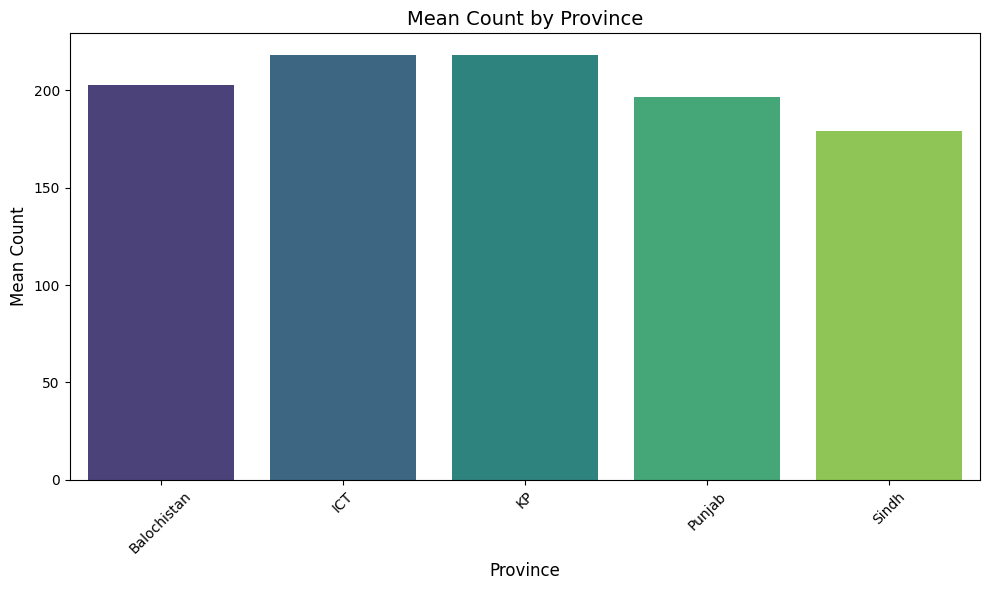

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the DataFrame is named 'ElectedCumData' and the column of interest is 'Count'

# Calculate the mean values grouped by "Province"
mean_by_province = ElectedCumName.groupby("Province")['Count'].mean()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_by_province.index, y=mean_by_province.values, palette="viridis")
plt.xlabel("Province", fontsize=12)
plt.ylabel("Mean Count", fontsize=12)
plt.title("Mean Count by Province", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Based on attendance records, the following is the ranking of member attendance in the five provinces of Pakistan:



1.   Khyber Pakhtunkhwa (KP): Members from KP consistently exhibit the highest attendance rates, demonstrating a strong commitment to parliamentary activities.

2.   Islamabad (ICT): Rank second and actively contribute to the parliamentary process.

3.   Balochistan: Rank third in attendance and actively contribute to the parliamentary process.

4.   Punjab: Members from Punjab rank forth in terms of attendance

5.   Sindh: Members from Sindh rank last in attendance and actively contribute to the parliamentary process.